# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [1]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import statistics
%matplotlib inline

In [2]:
def gradient(X, y, w):
    return 2 * np.dot(X.T, np.dot(X, w) - y) / y.shape[0]

In [3]:
# Проверка примера 
def gradient_descent(X, y, w, learn_rate, n_iter, eps):
    x = np.array([np.ones(X.shape[0]), X]).T
    
    print('x = ', x)
    print('y = ', y)
    print('w = ', w)
        
    k_iter = 0
    
    for _ in range(n_iter):
        print('x * w = ', np.dot(x, w))
        print('x * w - y = ', np.dot(x, w) - y)
        print('x.T * (x * w - y) = ', np.dot(x.T, np.dot(x, w) - y))
        
        grad = gradient(x, y, w)
        print('gradient = ', grad)
        
        diff = learn_rate * grad
        print('learn_rate * gradient = ', diff)
        w -= diff
        print('w = ', w)
        k_iter += 1
        
        if np.all(np.abs(diff) <= eps):
            break        
    return w, k_iter

X = np.array([2.0, 3.0, 5.0])
y = np.array([1.0, 3.0, 4.0])
w_0 = np.array([-2.0, 2.0])

# Иллюстрация одной итерации нахождения коэффициентов на основе градиентного спуска
w, k = gradient_descent(X, y, w_0, learn_rate = 0.046, n_iter = 1, eps = 1e-06)
print('\nw = ', w,' количество итераций = ', k)

x =  [[1. 2.]
 [1. 3.]
 [1. 5.]]
y =  [1. 3. 4.]
w =  [-2.  2.]
x * w =  [2. 4. 8.]
x * w - y =  [1. 1. 4.]
x.T * (x * w - y) =  [ 6. 25.]
gradient =  [ 4.         16.66666667]
learn_rate * gradient =  [0.184      0.76666667]
w =  [-2.184       1.23333333]

w =  [-2.184       1.23333333]  количество итераций =  1


In [4]:
# Функция нахождения вектора весов на основе градиентного спуска 
def gradient_descent(X, y, w, learn_rate=0.5, n_iter=100, eps=1e-06):
    x = np.array([np.ones(X.shape[0]), X]).T
    k_iter = 0
    for _ in range(n_iter):
        diff = learn_rate * gradient(x, y, w)
        w -= learn_rate * diff
        k_iter += 1
        if np.all(np.abs(diff) <= eps):
            break        
    return w, k_iter

In [5]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def lin_f_predict(X, w):
    X = np.array([np.ones(X.shape[0]), X]).T
    y_predict = np.dot(w, X.T)
    return y_predict

In [6]:
# Функция отрисовки
def paint(X, y, y_predict, y_predict_normal, m=1, width=10, height=7):
    plt.figure(figsize=(width, height))
    plt.scatter(X, y, 40, 'g', 'o', alpha=0.8, label='Исходные данные')
    plt.plot(X, y_predict, 'b', alpha=0.8, label='Линия регрессии по градиентному спуску') # Построение линейной регрессии по град.спуску
    plt.plot(X, y_predict_normal, 'r', alpha=0.8, label='Линия регресси по нормальному уравнению') # Построение линейной регрессии по нормальному уравнению
    plt.xlim(X.min() - m, X.max() + m)
    plt.ylim(y.min() - m, y.max() + m)
    plt.legend(loc = 'best', prop = {'size': 10})
    plt.title('Сравнение результатов линейной регрессии на основе градиентного спуска и нормального уравнения')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [8]:
# Функции ошибок

def MSE(y, y_predict):
        
    # Ваш код здесь
    mse = np.sum((y - y_predict) ** 2) / len(y)
    return mse  # Возвращаем значение ошибки

def RMSE(y, y_predict):
        
    # Ваш код здесь
    rmse = np.sqrt(np.sum((y - y_predict) ** 2) / len(y))
    return rmse # Возвращаем значение ошибки

def R2(y, y_predict):
        
    # Ваш код здесь
    r2 = 1 - np.sum((y - y_predict) ** 2) / np.sum((y - np.sum(y) / len(y)) ** 2)
    return r2  # Возвращаем значение ошибки

def print_f_err(y, y_predict):
    print('MSE = ', MSE(y, y_predict), ' scikit-learn MSE = ', mean_squared_error(y, y_predict))
    print('RMSE = ', RMSE(y, y_predict))
    print('R2 = ', R2(y, y_predict), ' scikit-learn R2_score = ', r2_score(y, y_predict))


Нормальное уравнение:

w =  [-0.42857143  0.92857143]

Градиентный спуск:

w =  [2.35775628e+75 8.87828320e+75]  Количество итераций =  100
MSE =  1.1435474267133587e+153  scikit-learn MSE =  1.1435474267133587e+153
RMSE =  3.3816378083901276e+76
R2 =  -7.351376314585878e+152  scikit-learn R2_score =  -7.351376314585878e+152


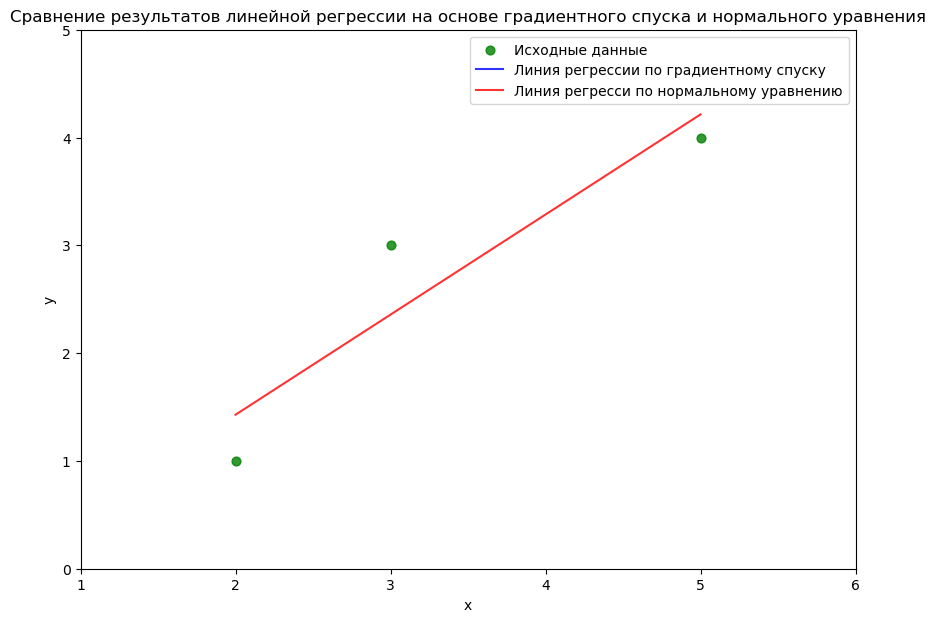

In [9]:
# Функция нахождения значений по линейной функции с предсказанными весовыми коэффициентами
def lin_reg(X, w):
    X = np.array([np.ones(X.shape[0]), X]).T
    y_predict = np.dot(w, X.T)
    return y_predict

# Функция нахождения вектора весов на основе нормального уравнения 
def get_weight(X, y):
    X = np.array([np.ones(X.shape[0]), X]).T
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return w  # Возвращаем вектор весов

X = np.array([2.0, 3.0, 5.0])
y = np.array([1.0, 3.0, 4.0])
w_0 = np.array([-2.0, 2.0])

# Нахождение коэффициентов на основе нормального уравнения
w = get_weight(X, y)
y_predict_normal = lin_reg(X, w)
print('\nНормальное уравнение:\n')
print('w = ', w)

w, k = gradient_descent(X, y, w_0)
y_predict = lin_f_predict(X, w)
print('\nГрадиентный спуск:\n')
print('w = ', w, ' Количество итераций = ', k)
print_f_err(y, y_predict)
paint(X, y, y_predict, y_predict_normal)


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [10]:
# Отрисовка
def paint_2(X_train, y_train, X_test, y_test, y_predict,  m=1, width=10, height=7):
    plt.figure(figsize=(width, height))
    x_min = min(X_train.min(), X_test.min())
    x_max = max(X_train.max(), X_test.max())
    y_min = min(y_train.min(), y_test.min(), y_predict.min())
    y_max = max(y_train.max(), y_test.max(), y_predict.max())
    plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='train')
    plt.scatter(X_test, y_test, 40, 'b', 'x', alpha=0.8, label='test')
    plt.plot(X_train, y_predict, 'r', alpha=0.8, label='predict')
    plt.xlim(x_min - m, x_max + m)
    plt.ylim(y_min - m, y_max + m)
    plt.legend(loc = 'best', prop = {'size': 10})
    plt.title('Fitted gradient_descent')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [11]:
# Загрузка данных
data_train = np.loadtxt('ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('ml_lab1_test.txt', delimiter=',')
# Разделение данных и целевых значений для обучающих данных
X_train = data_train[:,0]
y_train = data_train[:,1]
# Разделение данных и целевых значений для тестовых данных
X_test = data_test[:,0]
y_test = data_test[:,1]



Градиентный спуск (скорость обучения =  0.5 ):

w =  [4.43291417 2.27983777]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  0.29689669980272426  scikit-learn MSE =  0.29689669980272426
RMSE =  0.5448822806833823
R2 =  0.6978349218908411  scikit-learn R2_score =  0.6978349218908411

Ошибка на тестовом наборе:
MSE =  0.4350908030646102  scikit-learn MSE =  0.4350908030646102
RMSE =  0.6596141319473152
R2 =  0.6849014231648447  scikit-learn R2_score =  0.6849014231648447


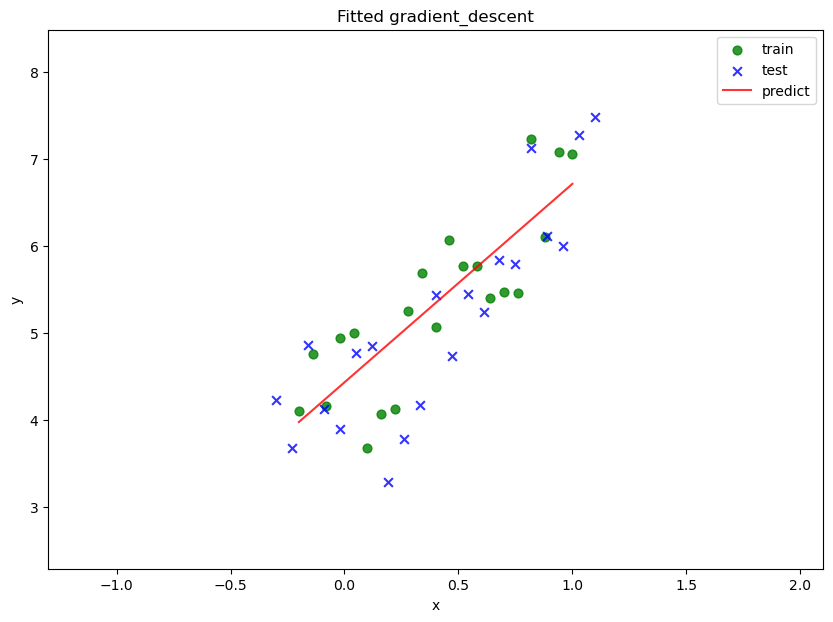


Градиентный спуск (скорость обучения =  1.0 ):

w =  [4.43322935 2.27913795]  Количество итераций =  21

Ошибка на обучающем наборе:
MSE =  0.2968966332641204  scikit-learn MSE =  0.2968966332641204
RMSE =  0.5448822196255998
R2 =  0.6978349896101604  scikit-learn R2_score =  0.6978349896101604

Ошибка на тестовом наборе:
MSE =  0.43512005577877794  scikit-learn MSE =  0.43512005577877794
RMSE =  0.6596363056857756
R2 =  0.6848802379581295  scikit-learn R2_score =  0.6848802379581295


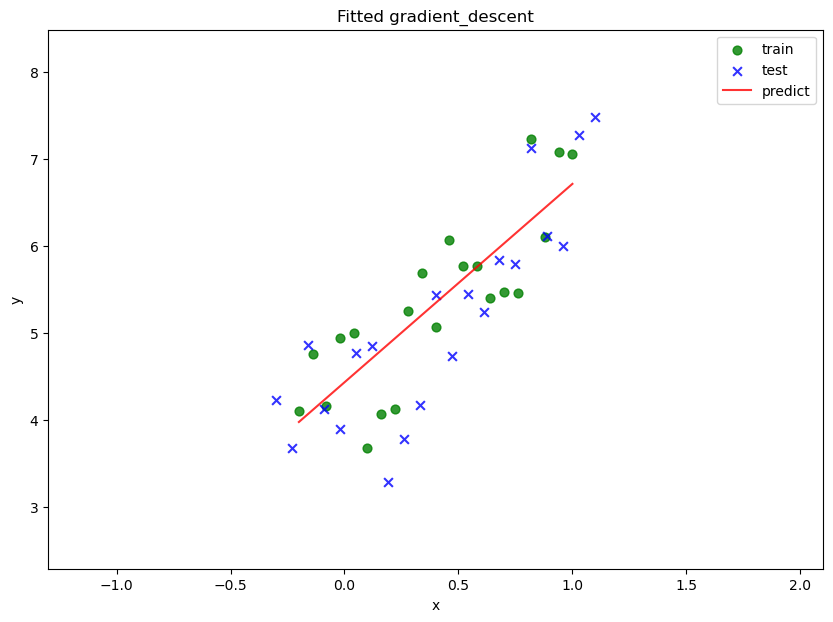


Градиентный спуск (скорость обучения =  2.0 ):

w =  [4.43323089 2.27913454]  Количество итераций =  2

Ошибка на обучающем наборе:
MSE =  0.2968966332625199  scikit-learn MSE =  0.2968966332625199
RMSE =  0.5448822196241312
R2 =  0.6978349896117892  scikit-learn R2_score =  0.6978349896117892

Ошибка на тестовом наборе:
MSE =  0.4351201988162275  scikit-learn MSE =  0.4351201988162275
RMSE =  0.6596364141072167
R2 =  0.684880134368496  scikit-learn R2_score =  0.684880134368496


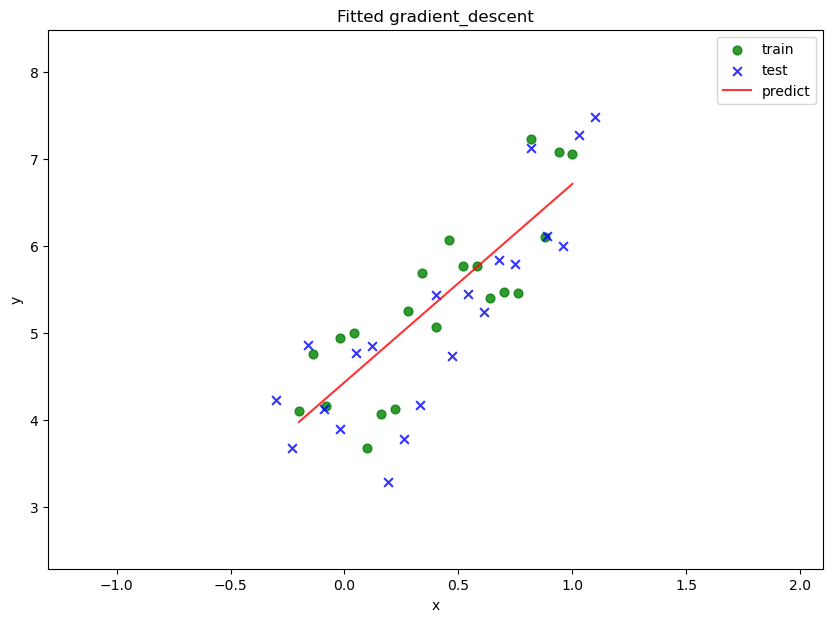

In [12]:
# Градиентный спуск
w_0 = np.array([1.0, 1.0]) # Начальный вектор коэффициентов (весов)
for learn_rate in [0.5, 1.0, 2.0]:
    w, k = gradient_descent(X_train, y_train, w_0, learn_rate)
    print('\nГрадиентный спуск (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('\nОшибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print_f_err(y_train, y_predict_train)
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print_f_err(y_test, y_predict_test)
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)

**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [13]:
# Стохастический градиентный спуск (вычисление градиента на одном случайном примере на каждой интерации)
def stochastic_gradient_descent(X, y, w, learn_rate=0.5, n_iter=100, eps=1e-06):
    x = np.array([np.ones(X.shape[0]), X]).T
    n_obs = x.shape[0] # Количество наблюдений (значений/примеров)
       
    k_iter = 0 # Число выполненных итераций
    n = learn_rate # Начальный коэффициент скорости обучения
    for _ in range(n_iter):
        start = np.random.randint(n_obs) # Выбор случайного значения (примера)
        x_batch = np.array([x[start]])
        y_batch = np.array([y[start]])        
        diff = learn_rate * gradient(x_batch, y_batch, w)
        w -= diff  
        k_iter += 1
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter # Уменьшение коэффициента скорости обучения
    return w, k_iter


Стохастический градиентный спуск (скорость обучения =  0.5 ):

w =  [4.2789206  2.58172037]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  0.3100896058915807  scikit-learn MSE =  0.3100896058915807
RMSE =  0.5568568989350682
R2 =  0.684407910066611  scikit-learn R2_score =  0.684407910066611

Ошибка на тестовом наборе:
MSE =  0.4329372787508427  scikit-learn MSE =  0.4329372787508427
RMSE =  0.6579796947861254
R2 =  0.6864610342659492  scikit-learn R2_score =  0.6864610342659492


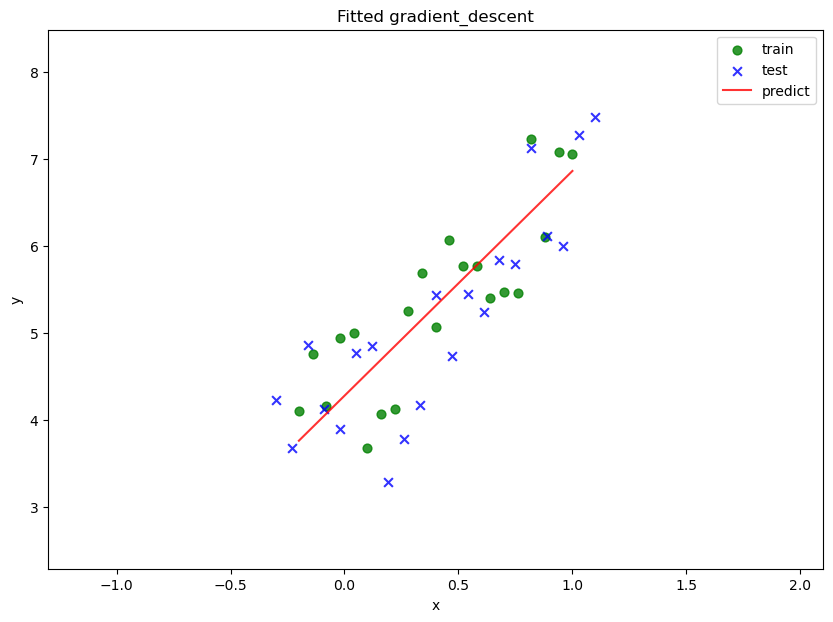


Стохастический градиентный спуск (скорость обучения =  1.0 ):

w =  [4.61229866 2.4829865 ]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  0.37029879710454744  scikit-learn MSE =  0.37029879710454744
RMSE =  0.6085218131706928
R2 =  0.6231303176317877  scikit-learn R2_score =  0.6231303176317877

Ошибка на тестовом наборе:
MSE =  0.6078979563365733  scikit-learn MSE =  0.6078979563365733
RMSE =  0.7796781107204263
R2 =  0.5597521722972179  scikit-learn R2_score =  0.5597521722972179


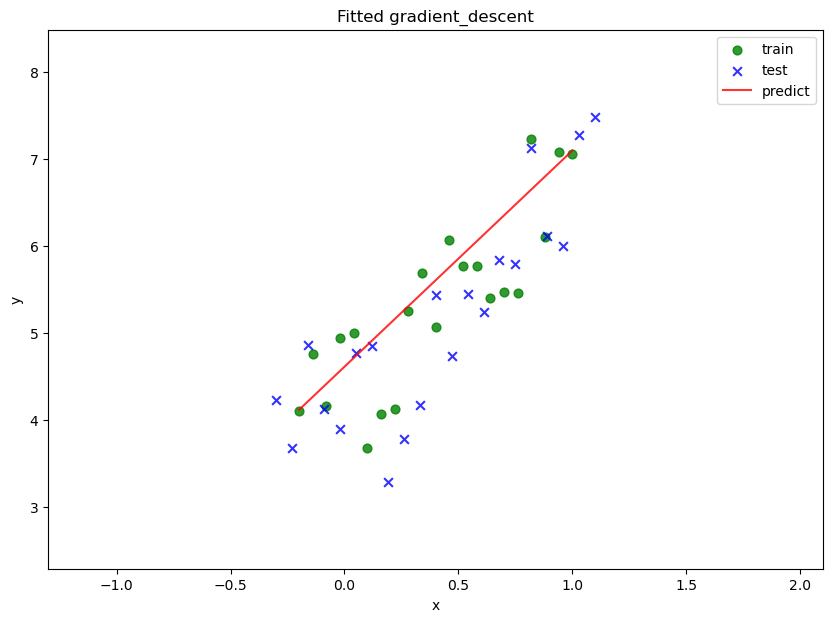


Стохастический градиентный спуск (скорость обучения =  2.0 ):

w =  [ 1.10670114e+17 -2.79938964e+17]  Количество итераций =  100

Ошибка на обучающем наборе:
MSE =  1.03459929314064e+34  scikit-learn MSE =  1.03459929314064e+34
RMSE =  1.0171525417264806e+17
R2 =  -1.0529580707068997e+34  scikit-learn R2_score =  -1.0529580707068997e+34

Ошибка на тестовом наборе:
MSE =  1.4081430508632552e+34  scikit-learn MSE =  1.4081430508632552e+34
RMSE =  1.1866520344495496e+17
R2 =  -1.01979602460463e+34  scikit-learn R2_score =  -1.01979602460463e+34


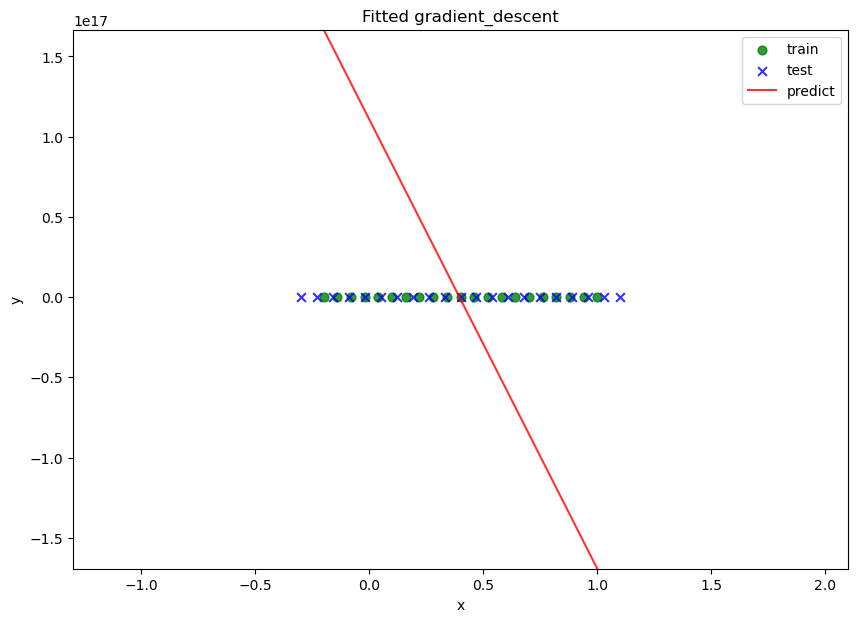

In [14]:
w_0 = np.array([1.0, 1.0])

for learn_rate in [0.5, 1.0, 2.0]:
    w, k = stochastic_gradient_descent(X_train, y_train, w_0, learn_rate, n_iter=100, eps=1e-06)
    print('\nСтохастический градиентный спуск (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('\nОшибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print_f_err(y_train, y_predict_train)
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print_f_err(y_test, y_predict_test)
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)

**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [15]:
# Градиентный спуск по мини-батчам (вычисление градиента на подмножестве из batch_size случайно выбранных примеров)
def mini_batch_gradient_descent(X, y, w, learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=50):
    #x = np.array([np.ones(X.shape[0]), X]).T
    n_obs = X.shape[0] # Количество наблюдений (значений)
    xy = np.c_[X.reshape(n_obs, 1), y.reshape(n_obs, 1)] # Объединение массивов x и y в один
    k_iter = 0
    n = learn_rate
    for _ in range(n_iter):
        rng.shuffle(xy) # Перемешивание x и y
        start = np.random.randint(n_obs-batch_size) # Выбор случайного значения
        stop = start + batch_size
        x_batch, y_batch = np.array(xy[start:stop, :-1].ravel().tolist()), np.array(xy[start:stop, -1:].ravel().tolist()) # Формирование мини-батча и разделение x и y
        x_batch = np.array([np.ones(x_batch.shape[0]), x_batch]).T            
        
        diff = learn_rate * gradient(x_batch, y_batch, w)
        w -= diff
        k_iter += 1    
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter
    return w, k_iter


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  0.5 ):

w =  [4.38846488 2.30390013]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  0.2981927971656333  scikit-learn MSE =  0.2981927971656333
RMSE =  0.546070322546129
R2 =  0.6965158255143549  scikit-learn R2_score =  0.6965158255143549

Ошибка на тестовом наборе:
MSE =  0.4222612178479997  scikit-learn MSE =  0.4222612178479997
RMSE =  0.6498162954620327
R2 =  0.6941927803129732  scikit-learn R2_score =  0.6941927803129732


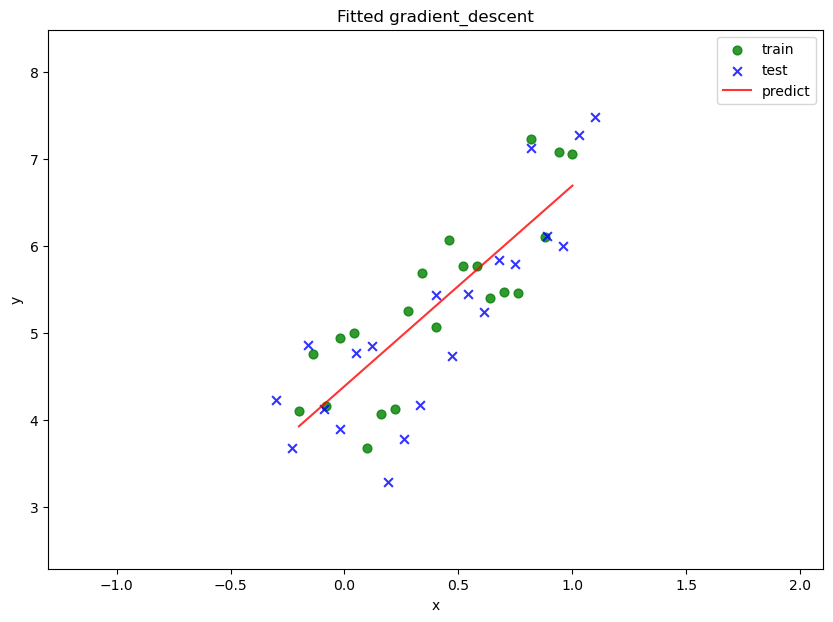


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  1.0 ):

w =  [4.41908603 2.22863973]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  0.29841262310716415  scikit-learn MSE =  0.29841262310716415
RMSE =  0.5462715653474599
R2 =  0.696292098801201  scikit-learn R2_score =  0.696292098801201

Ошибка на тестовом наборе:
MSE =  0.4244483877643709  scikit-learn MSE =  0.4244483877643709
RMSE =  0.6514970358830275
R2 =  0.6926088026166142  scikit-learn R2_score =  0.6926088026166142


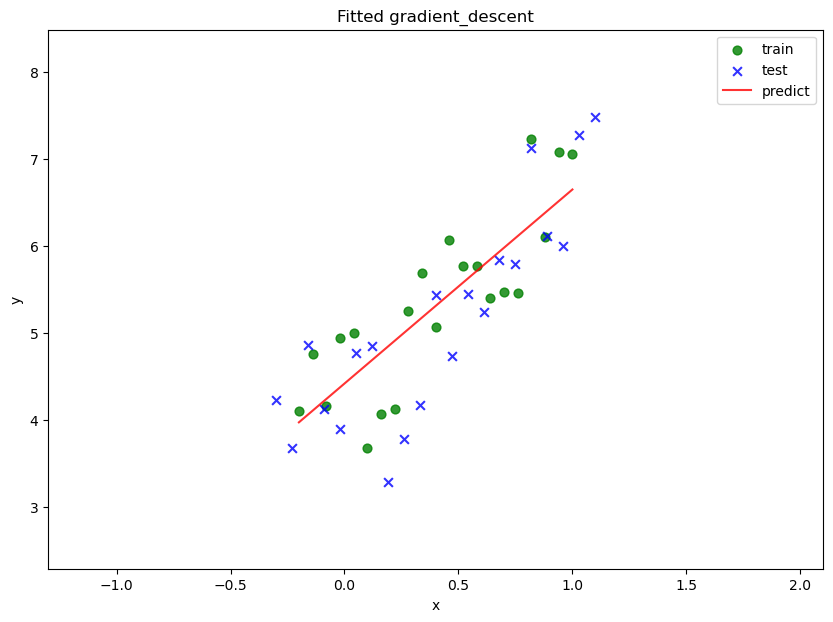


Стохастический градиентный спуск по мини-пакетам (скорость обучения =  2.0 ):

w =  [ 6.03896300e+16 -1.36737096e+17]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  2.5004390714688232e+33  scikit-learn MSE =  2.5004390714688232e+33
RMSE =  5.000439052192141e+16
R2 =  -2.5448089111115042e+33  scikit-learn R2_score =  -2.5448089111115042e+33

Ошибка на тестовом наборе:
MSE =  3.391664334694658e+33  scikit-learn MSE =  3.391664334694658e+33
RMSE =  5.82379973444714e+16
R2 =  -2.456288658453071e+33  scikit-learn R2_score =  -2.456288658453071e+33


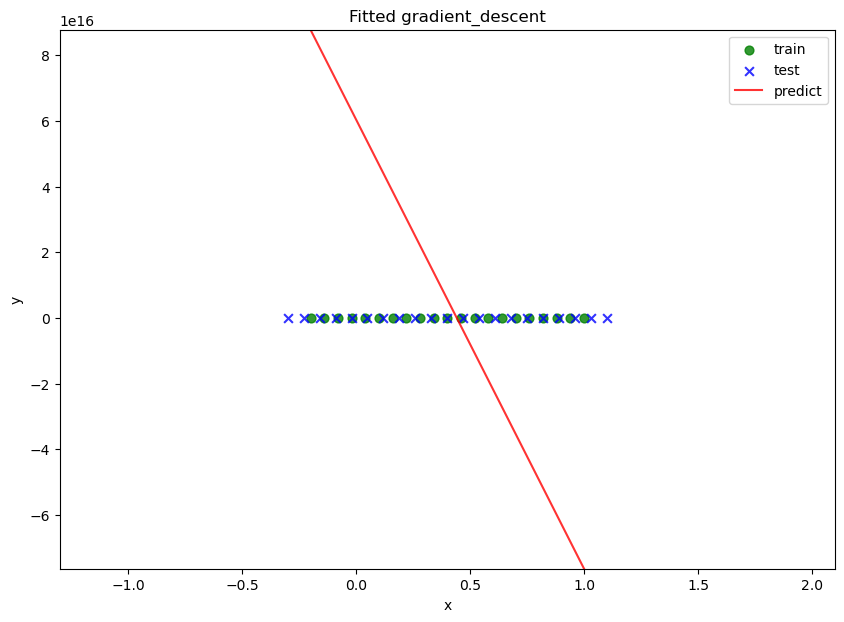

In [16]:
w_0 = np.array([1.0, 1.0])
rng = np.random.default_rng()

for learn_rate in [0.5, 1.0, 2.0]:
    w, k = mini_batch_gradient_descent(X_train, y_train, w_0, learn_rate, batch_size=10)
    print('\nСтохастический градиентный спуск по мини-пакетам (скорость обучения = ', learn_rate, '):\n')
    print('w = ', w, ' Количество итераций = ', k)
    print('Ошибка на обучающем наборе:')
    y_predict_train = lin_f_predict(X_train, w)
    print_f_err(y_train, y_predict_train)
    print('\nОшибка на тестовом наборе:')
    y_predict_test = lin_f_predict(X_test, w)
    print_f_err(y_test, y_predict_test)
    paint_2(X_train, y_train, X_test, y_test, y_predict_train)

### Оптимизированный вариант

In [17]:
# Обобщенный вариант функции градиентного спуска

# По умолчанию (learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=len(y), stochastic=False) - классический градиентный спуск
# При задании stochastic = True и batch_size < len(y) - стохастический по мини-батчам

def gradient_descent_all(X, y, w, learn_rate=0.5, n_iter=100, eps=1e-06, batch_size=None, stochastic=False):
    if stochastic:
        n_obs = X.shape[0] # Количество наблюдений (значений)
        xy = np.c_[X.reshape(n_obs, 1), y.reshape(n_obs, 1)] # Объединение массивов x и y в один
    
    k_iter = 0
    n = learn_rate
    for _ in range(n_iter):
        if stochastic:
            rng.shuffle(xy) # Перемешивание x и y
            start = np.random.randint(n_obs-batch_size) # Выбор случайного значения
            stop = start + batch_size
            x_batch, y_batch = np.array(xy[start:stop, :-1].ravel().tolist()), np.array(xy[start:stop, -1:].ravel().tolist()) # Формирование мини-батча и разделение x и y
        else:
            x_batch = X
            y_batch = y
        x_batch = np.array([np.ones(x_batch.shape[0]), x_batch]).T            

        diff = learn_rate * gradient(x_batch, y_batch, w)
        w -= diff
        k_iter += 1    
        if np.all(np.abs(diff) <= eps):
            break     
        learn_rate -= n / n_iter
    return w, k_iter

In [18]:
# Проверка работы функции gradient_descent_all
w_0 = np.array([1.0, 1.0])
rng = np.random.default_rng()
print('\nКлассический градиентный спуск')
w, k = gradient_descent_all(X_train, y_train, w_0)
print('w = ', w, ' Количество итераций = ', k)
print('\nСтохастический градиентный спуск по мини-батчам размера 1')
w, k = gradient_descent_all(X_train, y_train, w_0, batch_size=1, stochastic=True)
print('w = ', w, ' Количество итераций = ', k)
print('\nСтохастический градиентный спуск по мини-батчам размера 10')
w, k = gradient_descent_all(X_train, y_train, w_0, batch_size=10, stochastic=True)
print('w = ', w, ' Количество итераций = ', k)


Классический градиентный спуск
w =  [4.43294939 2.27975957]  Количество итераций =  100

Стохастический градиентный спуск по мини-батчам размера 1
w =  [4.70548701 2.20856489]  Количество итераций =  100

Стохастический градиентный спуск по мини-батчам размера 10
w =  [4.47277194 2.31794053]  Количество итераций =  100


In [19]:
# Функция исследования скорости спуска
def research_learn_rate(ar_learn_rate, X_train, y_train, w_0, n_iter=100, eps=1e-06, batch_size=None, stochastic=False):
    for learn_rate in ar_learn_rate:
        w, k = gradient_descent_all(X_train, y_train, w_0, learn_rate, n_iter, eps, batch_size, stochastic)
        print('\nГрадиентный спуск (learn_rate=', learn_rate, ', n_iter=' , n_iter, ', eps=', eps, 
              ', batch_size=', batch_size, ', stochastic=', stochastic, '):\n')
        print('w = ', w, ' Количество итераций = ', k)
        print('Ошибка на обучающем наборе:')
        y_predict_train = lin_f_predict(X_train, w)
        print_f_err(y_train, y_predict_train)
        print('\nОшибка на тестовом наборе:')
        y_predict_test = lin_f_predict(X_test, w)
        print_f_err(y_test, y_predict_test)
        paint_2(X_train, y_train, X_test, y_test, y_predict_train)    

Выбери вариант градиентного спуска:
1 - Классический
2 - Стохастический по одному примеру
3 - Стохастический по мини-батчам
0 - Выход


 1


Классический градиентный спуск

Градиентный спуск (learn_rate= 0.5 , n_iter= 100 , eps= 1e-06 , batch_size= None , stochastic= False ):

w =  [4.43294939 2.27975957]  Количество итераций =  100
Ошибка на обучающем наборе:
MSE =  0.2968966858287193  scikit-learn MSE =  0.2968966858287193
RMSE =  0.5448822678604244
R2 =  0.6978349361128122  scikit-learn R2_score =  0.6978349361128122

Ошибка на тестовом наборе:
MSE =  0.4350940627115072  scikit-learn MSE =  0.4350940627115072
RMSE =  0.6596166028167477
R2 =  0.6848990624849798  scikit-learn R2_score =  0.6848990624849798


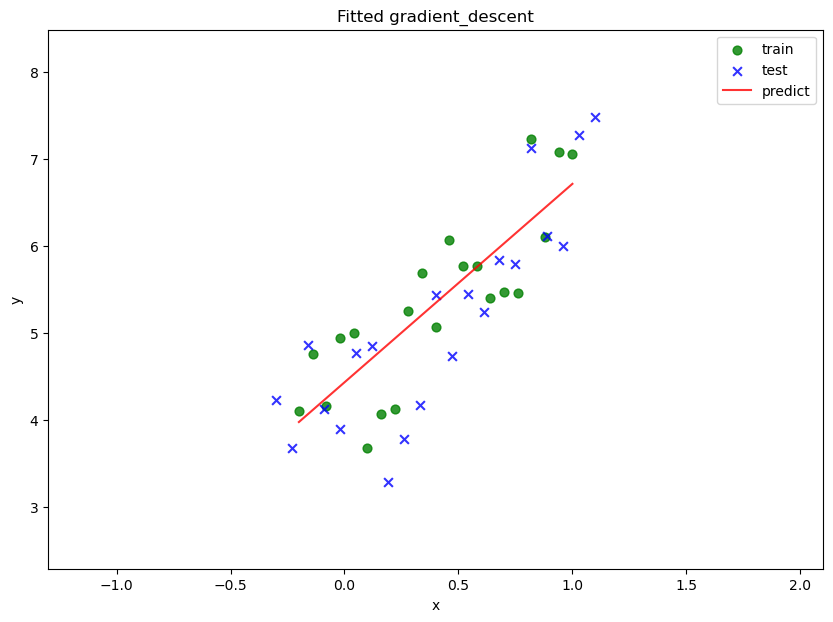


Градиентный спуск (learn_rate= 1.0 , n_iter= 100 , eps= 1e-06 , batch_size= None , stochastic= False ):

w =  [4.43322885 2.27913907]  Количество итераций =  22
Ошибка на обучающем наборе:
MSE =  0.29689663326532884  scikit-learn MSE =  0.29689663326532884
RMSE =  0.5448822196267087
R2 =  0.6978349896089305  scikit-learn R2_score =  0.6978349896089305

Ошибка на тестовом наборе:
MSE =  0.43512000880989243  scikit-learn MSE =  0.43512000880989243
RMSE =  0.659636270083667
R2 =  0.6848802719736243  scikit-learn R2_score =  0.6848802719736243


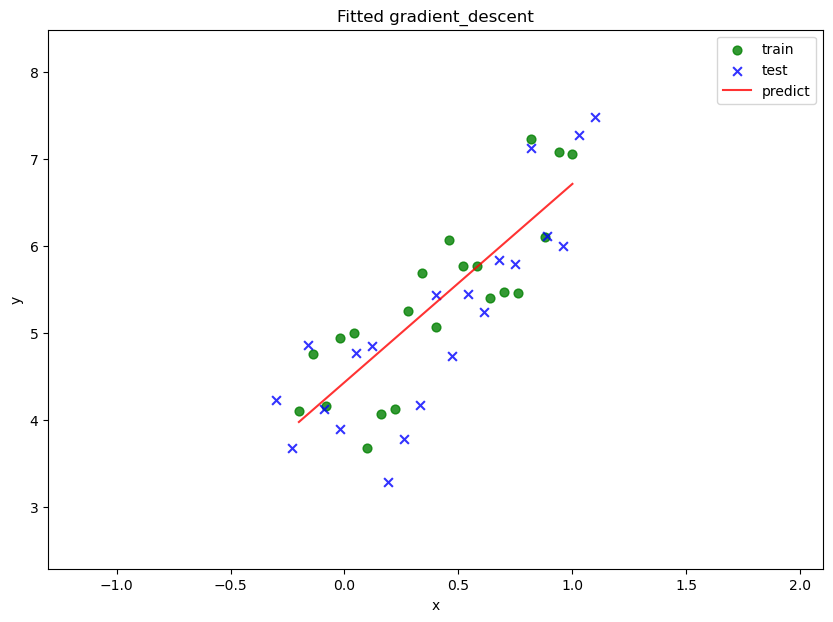


Градиентный спуск (learn_rate= 2.0 , n_iter= 100 , eps= 1e-06 , batch_size= None , stochastic= False ):

w =  [4.43323055 2.27913529]  Количество итераций =  3
Ошибка на обучающем наборе:
MSE =  0.2968966332626034  scikit-learn MSE =  0.2968966332626034
RMSE =  0.5448822196242078
R2 =  0.6978349896117043  scikit-learn R2_score =  0.6978349896117043

Ошибка на тестовом наборе:
MSE =  0.43512016728410075  scikit-learn MSE =  0.43512016728410075
RMSE =  0.6596363902060747
R2 =  0.6848801572044838  scikit-learn R2_score =  0.6848801572044838


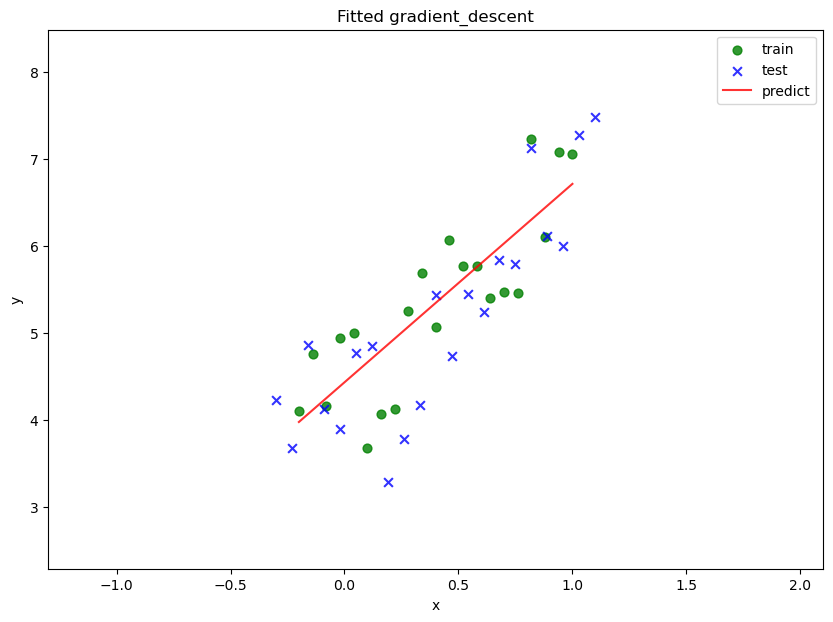

In [20]:
arr_rate = [0.5, 1.0, 2.0]
w_0 = np.array([1.0, 1.0])

# Загрузка данных
data_train = np.loadtxt('ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('ml_lab1_test.txt', delimiter=',')
# Разделение данных и целевых значений для обучающих данных
X_train = data_train[:,0]
y_train = data_train[:,1]
# Разделение данных и целевых значений для тестовых данных
X_test = data_test[:,0]
y_test = data_test[:,1]

print('Выбери вариант градиентного спуска:\n1 - Классический\n2 - Стохастический по одному примеру\n3 - Стохастический по мини-батчам\n0 - Выход')
x = input()
if x == '1':
        print('Классический градиентный спуск')
        research_learn_rate(arr_rate, X_train, y_train, w_0)
elif x == '2':
        print('Стохастический градиентный спуск по случайному примеру')
        research_learn_rate(arr_rate, X_train, y_train, w_0, batch_size= 1, stochastic= True)
elif x == '3':
        print('Стохастический градиентный спуск по мини-батчам\n')
        research_learn_rate(arr_rate, X_train, y_train, w_0, batch_size=15, stochastic=True)